## Project : To scrape cutomer reviews of british airlines and analyse the data collected for usable insights

#### Internship project for FORAGE British Airways Data Science project 

### Task 1
### Web scraping and analysis

Scraping data from Skytrax
If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use Python and BeautifulSoup to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [2]:
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from bs4 import BeautifulSoup
from textblob import TextBlob
from wordcloud import WordCloud
from string import digits
import requests
import pandas as pd
import nltk
import string
import seaborn as sns
import re
nltk.download("stopwords")
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hpcc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


Saving the reviews in a data frame

In [4]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Flight at 8.40am from DUB to...
1,✅ Trip Verified | Terrible. I have traveled t...
2,✅ Trip Verified | The customer service is ugl...
3,✅ Trip Verified | Most uncomfortable flight I...
4,✅ Trip Verified | I booked our first out of c...


Saving the dataframe in csv file 

In [5]:
df.to_csv("BA_reviews.csv")

#### TASK 2
#### Data cleaning

In [6]:
import pandas as pd

csv_path = "BA_reviews.csv"
df1 = pd.read_csv(csv_path)
df1.reset_index(drop=True, inplace=True)

print(df1['reviews'])


0      ✅ Trip Verified | Flight at 8.40am from DUB to...
1      ✅ Trip Verified |  Terrible. I have traveled t...
2      ✅ Trip Verified |  The customer service is ugl...
3      ✅ Trip Verified |  Most uncomfortable flight I...
4      ✅ Trip Verified |  I booked our first out of c...
                             ...                        
995    ✅ Trip Verified |  Bad service and attitude al...
996    ✅ Trip Verified |  London to Santiago de Chile...
997    ✅ Trip Verified |  Flew a now ageing B777 flig...
998    ✅ Trip Verified | Flew London Gatwick to Tiran...
999    ✅ Trip Verified |  London Heathrow to Murcia a...
Name: reviews, Length: 1000, dtype: object


In [7]:
df1.info()
df1.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  1000 non-null   int64 
 1   reviews     1000 non-null   object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


,Unnamed: 0
count,1000.000000
mean,499.500000
std,288.819436
min,0.000000
25%,249.750000
50%,499.500000
75%,749.250000
max,999.000000


There are no null values/ missing values in out dataset.
The dataset contains 1000 unique entries.
Removing (✅ Trip Verified | and Not Verified | ) to clean the data.
Removing any leading or trailing spaces.
Turning the review string to all lower case.


In [8]:
df1['reviews'] = df1['reviews'].str.strip()
df1['reviews']=df1['reviews'].str.lstrip('✅ Trip Verified |')
df1['reviews']=df1['reviews'].str.lstrip('Not Verified |')
df1['reviews']= df1['reviews'].str.lower()
print(df1)

     Unnamed: 0                                            reviews
0             0  flight at 8.40am from dub to lcy cancelled 115...
1             1  ble. i have traveled twice with them this year...
2             2  he customer service is ugly. tried calling two...
3             3  most uncomfortable flight i have ever experien...
4             4  i booked our first out of country trip to take...
..          ...                                                ...
995         995  bad service and attitude all round. my fiasco ...
996         996  london to santiago de chile. i was flying prem...
997         997  flew a now ageing b777 flight ba 0053 to seatt...
998         998  flew london gatwick to tirana rinas. bag drop ...
999         999  london heathrow to murcia and back. a few prob...

[1000 rows x 2 columns]


## TASK 3
#### Sentiment analysis of reviews using nltk 

Remove punctutaions

In [9]:
#remove punctuation
df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')
print(df1['reviews'])

0      flight at 840am from dub to lcy cancelled 1155...
1      ble i have traveled twice with them this year ...
2      he customer service is ugly tried calling two ...
3      most uncomfortable flight i have ever experien...
4      i booked our first out of country trip to take...
                             ...                        
995    bad service and attitude all round my fiasco w...
996    london to santiago de chile i was flying premi...
997    flew a now ageing b777 flight ba 0053 to seatt...
998    flew london gatwick to tirana rinas bag drop a...
999    london heathrow to murcia and back a few probl...
Name: reviews, Length: 1000, dtype: object


C:\Users\Hpcc\AppData\Local\Temp\ipykernel_9740\998233352.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df1['reviews'] = df1['reviews'].str.replace('[^\w\s]','')


Tokenize the review column

In [10]:
# tokenize
print(df1.iloc[1,1])
df1['reviews'] = df1.apply(lambda row: nltk.word_tokenize(row['reviews']), axis=1)
print(df1.iloc[0,1])

ble i have traveled twice with them this year via business class and they have been significantly delayed or cancellations with connecting flights the customer service or complete lack of it is appalling and has forced me to change credit cards as i no longer intend to use ba for any further flights terrible uncomfy old planes and miserable staff
['flight', 'at', '840am', 'from', 'dub', 'to', 'lcy', 'cancelled', '1155pm', 'night', 'before', 'no', 'text', 'message', 'no', 'phone', 'waiting', 'at', 'bus', 'stop', 'and', 'randomly', 'checked', 'email', 'to', 'see', 'alternate', 'flight', 'option', 'hang', 'on', 'whats', 'this', 'it', 'was', 'dark', 'at', '5am', 'it', 'was', 'hard', 'to', 'see', 'mobile', 'phone', 'screen', 'im', 'still', 'jet', 'lagged', 'only', 'option', 'was', 'to', 'lhr', 'at', '920am', 'tried', 'calling', 'no', 'one', 'there', 'so', 'accepted', 'it', 'but', 'i', 'didnt', 'see', 'the', 'day', 'change', 'it', 'was', 'the', 'next', 'day', 'i', 'didnt', 'want', 'the', 'fl

Removing stopwords

In [11]:
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x if word not in (stop_words)]))
print(df1.head(20))

    Unnamed: 0                                            reviews
0            0  flight 840am dub lcy cancelled 1155pm night te...
1            1  ble traveled twice year via business class sig...
2            2  customer service ugly tried calling two weeks ...
3            3  uncomfortable flight ever experienced long tim...
4            4  booked first country trip take husband surpris...
5            5  husband booked seats within premium economy bo...
6            6  may 3 flew seattle heathrow edinburgh ba lost ...
7            7  went three flights reach destination ba flight...
8            8  excellent flight club world british airways we...
9            9  flight schedule delayed one hour boarding plan...
10          10  worst experience years travel first flight two...
11          11  worst experience years travel bag destroyed fl...
12          12  ble delays rebook domestic travel 5 passengers...
13          13  serious medical problem appeared onboard infor...
14        

Calculate polarity to gather sentiment tags.

In [12]:
def polarity_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None
    

    
def tag_cal(num):
    if num<0:
        return 'Negative'
    elif num>0:
        return 'Positive'
    else:
        return 'Neutral'
        
    
df1['polarity'] = df1['reviews'].apply(polarity_calc)


df1['tag'] = df1['polarity'].apply(tag_cal)


print(df1)

     Unnamed: 0                                            reviews  polarity  \
0             0  flight 840am dub lcy cancelled 1155pm night te... -0.050253   
1             1  ble traveled twice year via business class sig... -0.296429   
2             2  customer service ugly tried calling two weeks ... -0.275000   
3             3  uncomfortable flight ever experienced long tim... -0.127778   
4             4  booked first country trip take husband surpris... -0.008631   
..          ...                                                ...       ...   
995         995  bad service attitude round fiasco flight londo... -0.268333   
996         996  london santiago de chile flying premium econom...  0.239286   
997         997  flew ageing b777 flight ba 0053 seattle pleasa...  0.154023   
998         998  flew london gatwick tirana rinas bag drop gatw...  0.203947   
999         999  london heathrow murcia back problems heathrow ...  0.318750   

          tag  
0    Negative  
1    Ne

## TASK 4 
#### Analyze 

The percentage of various types of tags.


In [13]:
(df1.groupby('tag').size()/df1['tag'].count())*100

tag
Negative    32.7
Neutral      1.3
Positive    66.0
dtype: float64

Number of each kind of reviews

## TASK 5
#### Visualizing the results

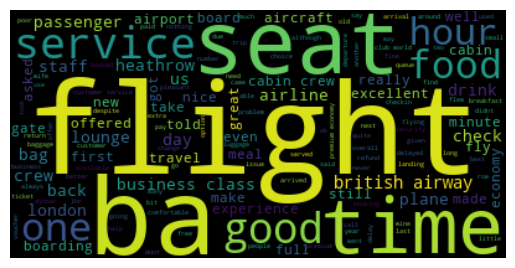

In [14]:
text = " "
for ind in df1.index:
    if df1['tag'][ind] == "Positive":
        text = text + df1['reviews'][ind]
      
wordcloud_positive = WordCloud().generate(text)


# Display the generated image:
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis("off")
plt.show()


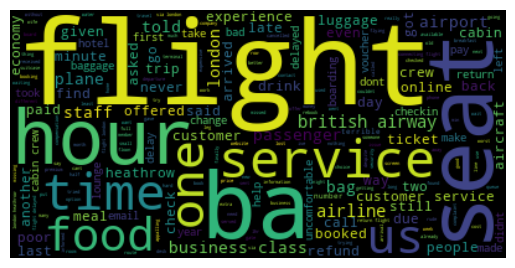

In [15]:
text2= " "        
for ind in df1.index:
    if df1['tag'][ind] == "Negative":
        text2 = text2 + df1['reviews'][ind]  
wordcloud_negative = WordCloud().generate(text2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis("off")
plt.show()

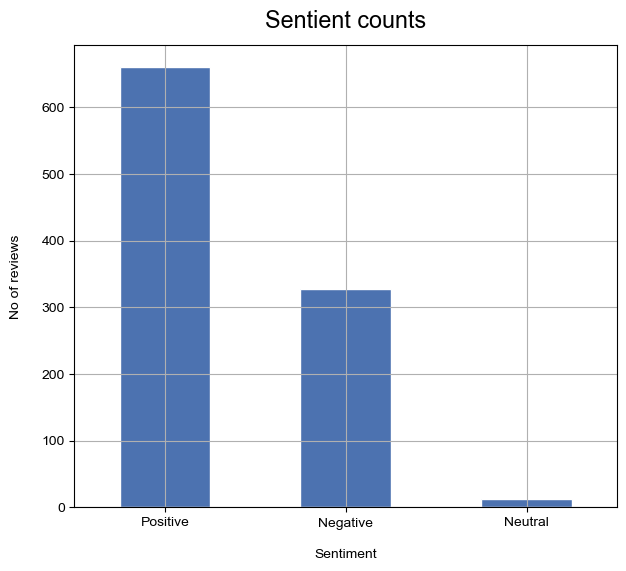

In [16]:
df1['tag'].value_counts().plot(kind='bar')
sns.set(font_scale=1.4)
df1['tag'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Sentiment", labelpad=14)
plt.ylabel("No of reviews", labelpad=14)
plt.title("Sentient counts", y=1.02);